In [14]:
import pandas as pd
df=pd.read_csv('./grouped_data5.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,0.000000,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,83807.860000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,19957.600000,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,0.000000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,62755.410000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,0.000000,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,5736.961000,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,0.000000,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,25025.103333,2,1,46444.260,0,92888.52,high,1


In [15]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'salary_per_products', 'active_member',
       'estimated_salary', 'salary_range', 'churn'],
      dtype='object')

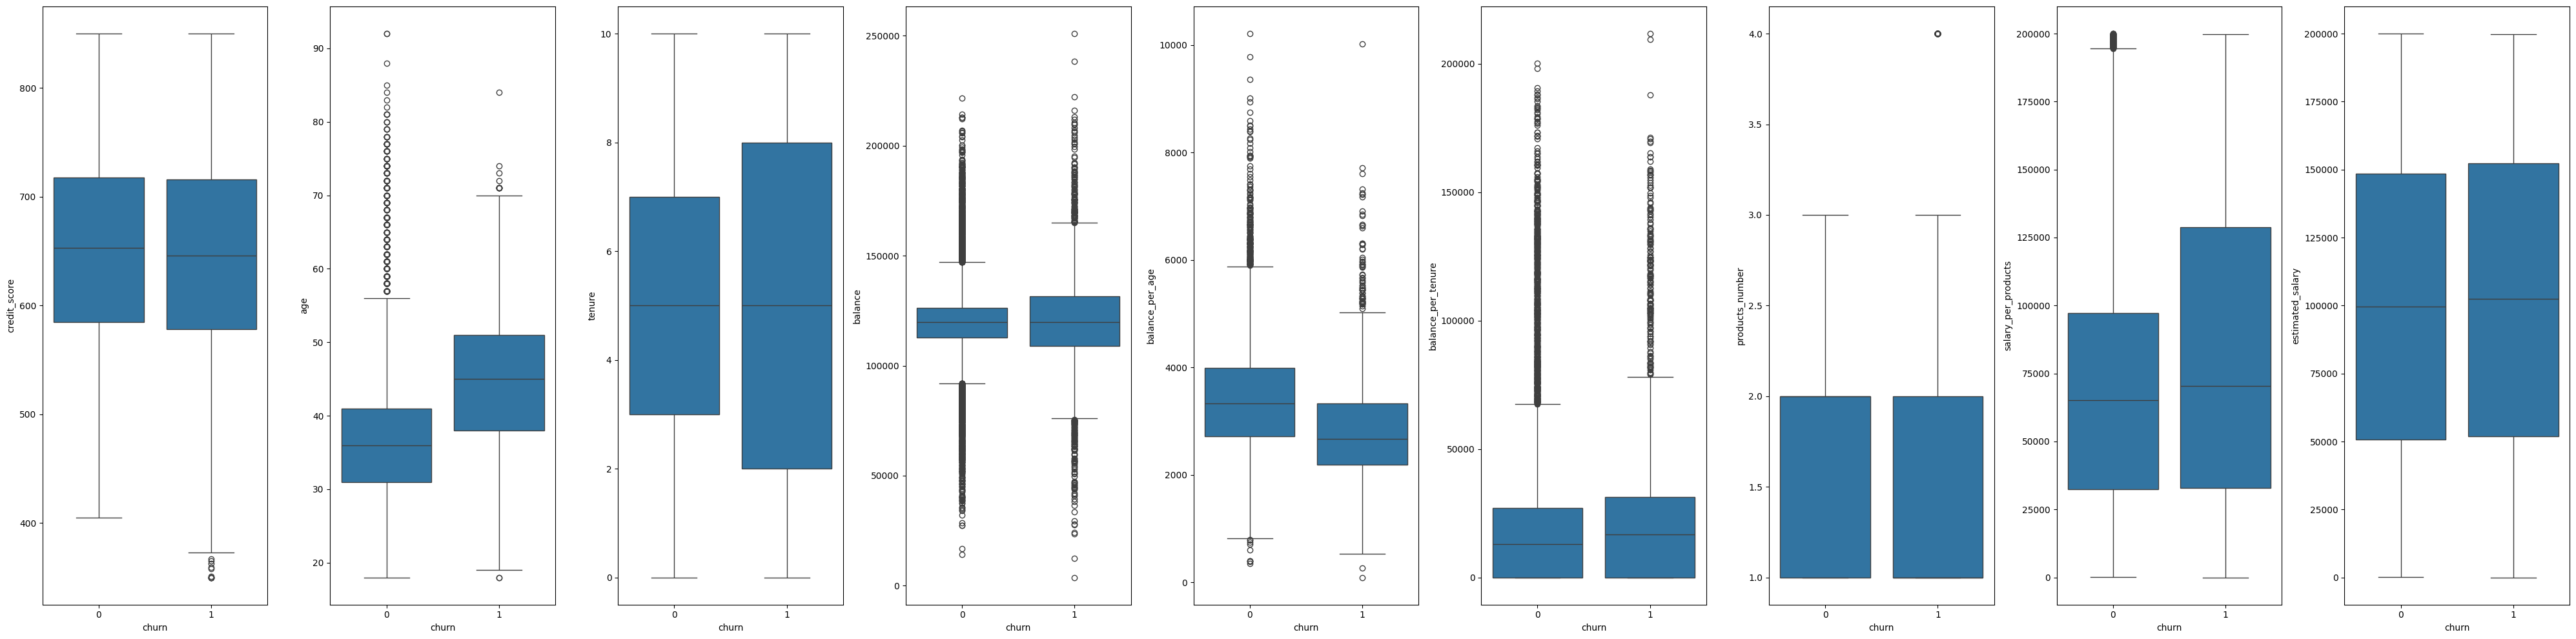

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# y값 리스트
y_vars = ['credit_score','age','tenure','balance','balance_per_age',
          'balance_per_tenure', 'products_number','salary_per_products',
          'estimated_salary']

# subplot 설정
plt.figure(figsize=(40, 10))

for i, y_var in enumerate(y_vars):
    plt.subplot(1,9, i + 1)
    sns.boxplot(x='churn', y=y_var, data=df)
    plt.xlabel('churn')
    plt.ylabel(y_var)
    # plt.title(f'Distribution of {y_var} by churn')

plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'salary_per_products', 'active_member',
       'estimated_salary', 'salary_range', 'churn'],
      dtype='object')

C:\Users\chaey\AppData\Local\Temp\ipykernel_17840\3721976250.py:28: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


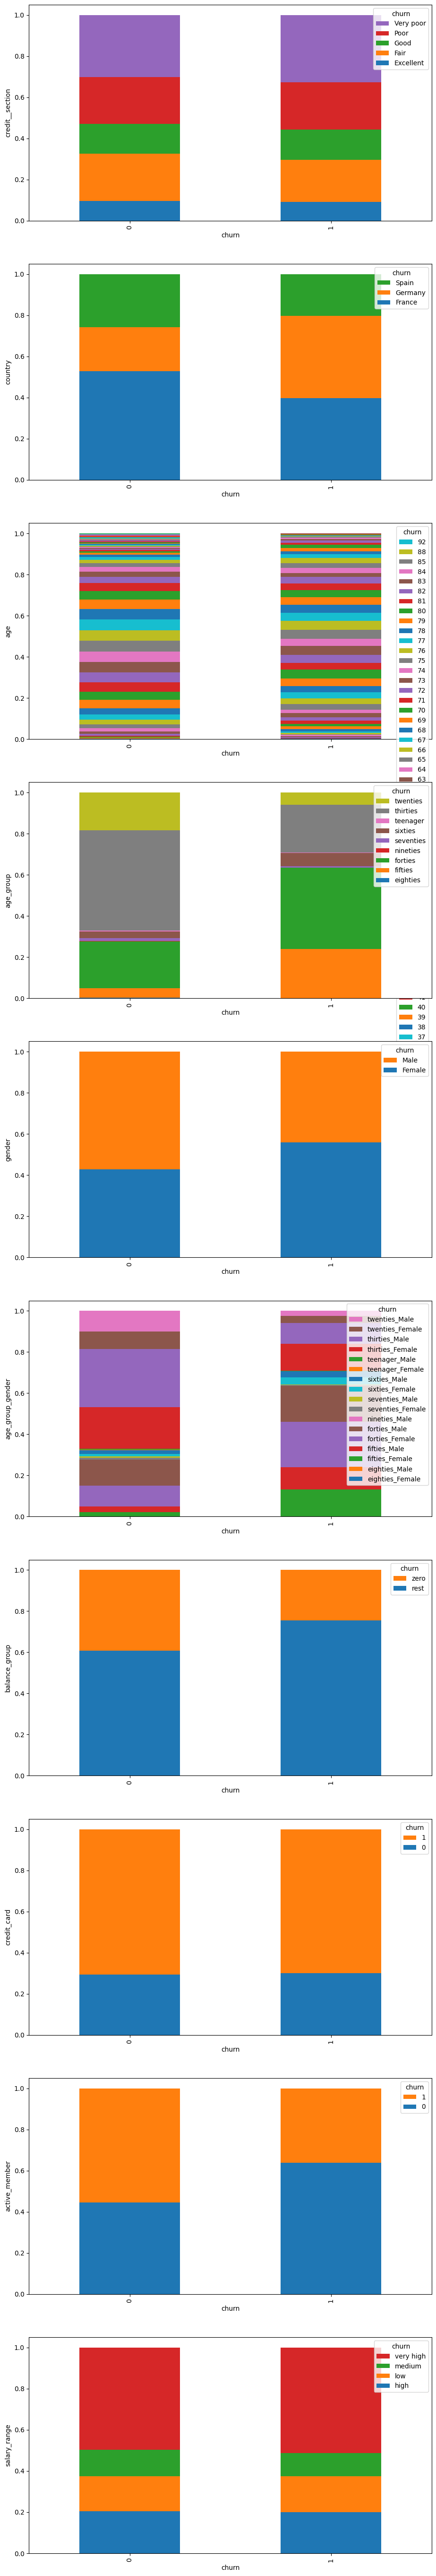

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 변수형 독립 변수 리스트
independent_vars = ['credit__section', 'country', 'age', 'age_group',
                    'gender', 'age_group_gender','balance_group',
                    'credit_card','active_member','salary_range']

# subplot 설정
plt.figure(figsize=(11, 70))

for i, var in enumerate(independent_vars):
    plt.subplot(10, 1, i + 1)
    
    # 크로스탭을 사용하여 스택형 비율 계산
    crosstab = pd.crosstab(df['churn'], df[var], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca()
                #   color=['skyblue', 'orange']
                  )
    
    # plt.title(f'Stacked Bar Plot of {var} by Dependent Variable')
    plt.ylabel(var)
    plt.xlabel('churn')
    # plt.legend(title='churn', loc='upper right')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), title='churn', loc='upper right')

plt.tight_layout()
plt.show()

In [19]:
# 이탈률을 구분해주는 변수 리스트

# 수치형
# 나이, 잔액 대비 나이,
# 상품 보유 기간, 봉급 대비 상품 보유 개수

# 범주형
# 나라, 나이 그룹, 성별,
# 나이 그룹 성별, 잔액 그룹, 활동 정도 

# 중요 변수
# 나이, 나라, 잔액, 성별, 활동 정도

# 향후 계획
# 19개 변수에 대해 다시 정보이득 때리기

In [20]:
help(df.astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t | None' = None, errors: 'IgnoreRaise' = 'raise') -> 'Self' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : str, data type, Series or Mapping of column name -> data type
        Use a str, numpy.dtype, pandas.ExtensionDtype or Python type to
        cast entire pandas object to the same type. Alternatively, use a
        mapping, e.g. {col: dtype, ...}, where col is a column label and dtype is
        a numpy.dtype or Python type to cast one or more of the DataFrame's
        columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    
        .. note::
            The `copy` keyword will change behavior in pandas 3.0.
            `Copy-

In [25]:
df['churn']=df['churn'].astype('object')

In [26]:
df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card              int64
salary_per_products    float64
active_member            int64
estimated_salary       float64
salary_range            object
churn                   object
dtype: object

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

# 예제 데이터프레임 생성
# data = {
#     'age': [23, 45, 34, 25, 32, 45, 54, 40, 38, 28],
#     'salary': [50000, 60000, 70000, 50000, 60000, 75000, 80000, 90000, 95000, 60000],
#     'category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
#     'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male']
# }
# df = pd.DataFrame(data)

categorical_columns = df.select_dtypes(include=['category'])

# 범주형 변수 인코딩
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 엔트로피 계산 함수
def entropy(y):
    proportions = y.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# 정보 이득 계산 함수
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    feature_values = df[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# 각 칼럼에 대한 정보 이득 계산
target = 'churn'
for feature in df.columns:
    if feature != target:
        ig = information_gain(df, feature, target)
        # print(f'Information Gain of {feature} with respect to {target}: {ig}')
        print(f"'{feature}':{ig}")

'credit_score':0.038547012884779575
'credit__section':0.0006065068745300106
'country':0.020222322423849803
'age':0.10721551580707478
'age_group':0.08887078499166601
'gender':0.008154397807196179
'age_group_gender':0.09664136838137116
'tenure':0.0010139452215386369
'balance':0.5191397545967105
'balance_group':0.011307710863572629
'balance_per_age':0.5539961051430762
'balance_per_tenure':0.4937072549203512
'products_number':0.10092156424028342
'credit_card':3.6636757529517894e-05
'salary_per_products':0.7292666572167683
'active_member':0.01773286854203171
'estimated_salary':0.7292666572167683
'salary_range':0.00025850396979343326


In [36]:
# 딕셔너리 생성
example_dict = {
    'credit_score':0.038547012884779575,
'credit__section':0.0006065068745300106,
'country':0.020222322423849803,
'age':0.10721551580707478,
'age_group':0.08887078499166601,
'gender':0.008154397807196179,
'age_group_gender':0.09664136838137116,
'tenure':0.0010139452215386369,
'balance':0.5191397545967105,
'balance_group':0.011307710863572629,
'balance_per_age':0.5539961051430762,
'balance_per_tenure':0.4937072549203512,
'products_number':0.10092156424028342,
'credit_card':3.6636757529517894e-05,
'salary_per_products':0.7292666572167683,
'active_member':0.01773286854203171,
'estimated_salary':0.7292666572167683,
'salary_range':0.00025850396979343326
}

# 벨류값에 따라 딕셔너리 정렬
sorted_items = sorted(example_dict.items(), key=lambda item: item[1],reverse=True)

# 정렬된 결과를 깔끔하게 출력
for key, value in sorted_items:
    print(f'{key:21} {value:.5f}')


salary_per_products   0.72927
estimated_salary      0.72927
balance_per_age       0.55400
balance               0.51914
balance_per_tenure    0.49371
age                   0.10722
products_number       0.10092
age_group_gender      0.09664
age_group             0.08887
credit_score          0.03855
country               0.02022
active_member         0.01773
balance_group         0.01131
gender                0.00815
tenure                0.00101
credit__section       0.00061
salary_range          0.00026
credit_card           0.00004
